In [1]:
import geopandas as gpd

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

In [4]:
df_locales = pd.read_csv("locales-bailables.csv", encoding='latin1')

In [5]:
df_locales.head()

,X,Y,NUMERO_REGISTRO,NOMBRE,CALLE,NUMERO,DIRECCION_NORMALIZADA,NUMERO_EXPEDIENTE,CAPACIDAD,CLASE,...,NUMERO_DISP_DE_RECHAZO,FECHA_DISPOSICION_DE_RECHAZO,NUMERO_DISPOSICION_DE_RECALCULO_CAPACIDAD,FECHA_DISPOSICION_DE_CAPACIDAD,FECHA_DE_ENTREGA_NUEVA_REVALIDA,VENCIMIENTO,BARRIO,COMUNA,CP,CPA
0,-58.393750,-34.605027,1,CASTELBAMBA,RIOBAMBA,345,RIOBAMBA 345,4627093/18,428 personas,"""C""",...,NaN,NaN,158,2005-12-12 00:00:00,2018-01-25,2018-04-13,Balvanera,Comuna 3,1025.0,C1025ABG
1,-58.378510,-34.596003,2,GOLDEN,ESMERALDA,1040,ESMERALDA 1040,10561/05,408 personas,"""C.C""",...,NaN,NaN,98,2005-08-08 00:00:00,NaN,NaN,Retiro,Comuna 1,1007.0,C1007ABN
2,-58.374727,-34.612002,3,REY CASTRO,PERU,342,PERU 342,4407796/18,901 personas,"""C""",...,NaN,NaN,67,2006-04-24 00:00:00,2018-05-31,2018-09-03,Monserrat,Comuna 1,1067.0,C1067AAH
3,-58.390154,-34.605531,4,LA FRANCE,SARMIENTO,1656,SARMIENTO 1656,3005915/18,1372 personas,"""C.C""",...,NaN,NaN,136,2005-09-29 00:00:00,2018-07-13,2018-10-13,San Nicolas,Comuna 1,1042.0,C1042ABF
4,-58.371747,-34.601950,5,BAHREIN,LAVALLE,343,LAVALLE 343,2219876/18,880 personas,"""C""",...,NaN,NaN,95,2007-11-06 00:00:00,2018-06-28,2018-09-30,San Nicolas,Comuna 1,1047.0,C1047AAG


In [7]:
geo_locales = gpd.GeoDataFrame(df_locales,geometry=gpd.points_from_xy(df_locales.X, df_locales.Y))
geo_locales.head()

,X,Y,NUMERO_REGISTRO,NOMBRE,CALLE,NUMERO,DIRECCION_NORMALIZADA,NUMERO_EXPEDIENTE,CAPACIDAD,CLASE,...,FECHA_DISPOSICION_DE_RECHAZO,NUMERO_DISPOSICION_DE_RECALCULO_CAPACIDAD,FECHA_DISPOSICION_DE_CAPACIDAD,FECHA_DE_ENTREGA_NUEVA_REVALIDA,VENCIMIENTO,BARRIO,COMUNA,CP,CPA,geometry
0,-58.393750,-34.605027,1,CASTELBAMBA,RIOBAMBA,345,RIOBAMBA 345,4627093/18,428 personas,"""C""",...,NaN,158,2005-12-12 00:00:00,2018-01-25,2018-04-13,Balvanera,Comuna 3,1025.0,C1025ABG,POINT (-58.39375 -34.60503)
1,-58.378510,-34.596003,2,GOLDEN,ESMERALDA,1040,ESMERALDA 1040,10561/05,408 personas,"""C.C""",...,NaN,98,2005-08-08 00:00:00,NaN,NaN,Retiro,Comuna 1,1007.0,C1007ABN,POINT (-58.37851 -34.59600)
2,-58.374727,-34.612002,3,REY CASTRO,PERU,342,PERU 342,4407796/18,901 personas,"""C""",...,NaN,67,2006-04-24 00:00:00,2018-05-31,2018-09-03,Monserrat,Comuna 1,1067.0,C1067AAH,POINT (-58.37473 -34.61200)
3,-58.390154,-34.605531,4,LA FRANCE,SARMIENTO,1656,SARMIENTO 1656,3005915/18,1372 personas,"""C.C""",...,NaN,136,2005-09-29 00:00:00,2018-07-13,2018-10-13,San Nicolas,Comuna 1,1042.0,C1042ABF,POINT (-58.39015 -34.60553)
4,-58.371747,-34.601950,5,BAHREIN,LAVALLE,343,LAVALLE 343,2219876/18,880 personas,"""C""",...,NaN,95,2007-11-06 00:00:00,2018-06-28,2018-09-30,San Nicolas,Comuna 1,1047.0,C1047AAG,POINT (-58.37175 -34.60195)


<AxesSubplot:>

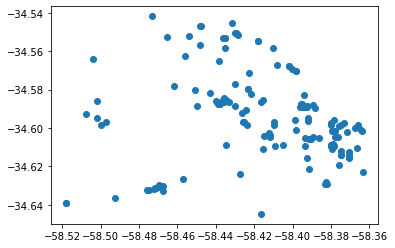

In [8]:
geo_locales.plot()

In [10]:
df_ciudad = pd.DataFrame(
    {'Ciudad': ['Bogota','Cali', 'Medellin', 'Barranquilla'],
     'Latitud': [4.60971, 3.43722, 6.25184, 10.96854],
     'Longitud': [-74.08175, -76.5225, -75.56359, -74.78132]})

df_ciudad

,Ciudad,Latitud,Longitud
0,Bogota,4.60971,-74.08175
1,Cali,3.43722,-76.52250
2,Medellin,6.25184,-75.56359
3,Barranquilla,10.96854,-74.78132


<AxesSubplot:>

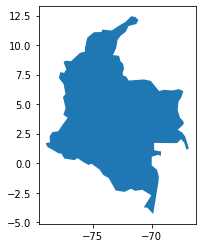

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world
geo_colombia = world[world.name=='Colombia']
geo_colombia.plot()